<a href="https://colab.research.google.com/github/naren-17/BOOTCAMP/blob/main/Day8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TASK 1**

In [1]:
import numpy as np

x = np.array([[0.5, 0.8]])
y_true = np.array([[1.2]])

W1 = np.array([[0.2, -0.4], [0.3, 0.1]])
b1 = np.array([[0.1, -0.2]])
W2 = np.array([[0.5], [-0.3]])
b2 = np.array([[0.05]])

z1 = np.dot(x, W1) + b1
a1 = np.maximum(0, z1)

z2 = np.dot(a1, W2) + b2
y_pred = z2

loss = 0.5 * (y_true - y_pred) ** 2

dL_dy = y_pred - y_true
dL_dW2 = np.dot(a1.T, dL_dy)
dL_db2 = dL_dy

dL_da1 = np.dot(dL_dy, W2.T)
dL_dz1 = dL_da1 * (z1 > 0)

dL_dW1 = np.dot(x.T, dL_dz1)
dL_db1 = dL_dz1

learning_rate = 0.01
W1 -= learning_rate * dL_dW1
b1 -= learning_rate * dL_db1
W2 -= learning_rate * dL_dW2
b2 -= learning_rate * dL_db2

print("Updated W1:", W1)
print("Updated b1:", b1)
print("Updated W2:", W2)
print("Updated b2:", b2)


Updated W1: [[ 0.202325 -0.4     ]
 [ 0.30372   0.1     ]]
Updated b1: [[ 0.10465 -0.2    ]]
Updated W2: [[ 0.504092]
 [-0.3     ]]
Updated b2: [[0.0593]]


# **TASK 2**

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


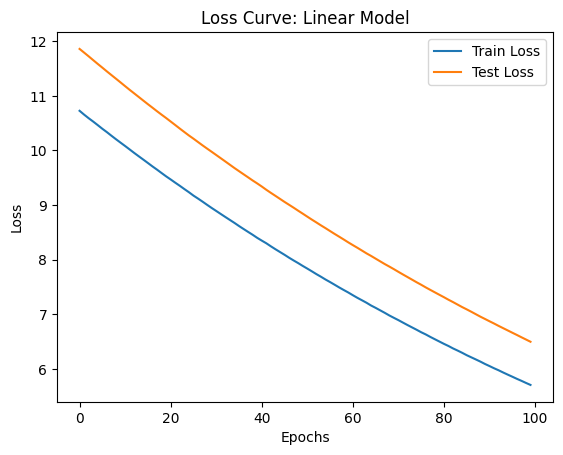

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


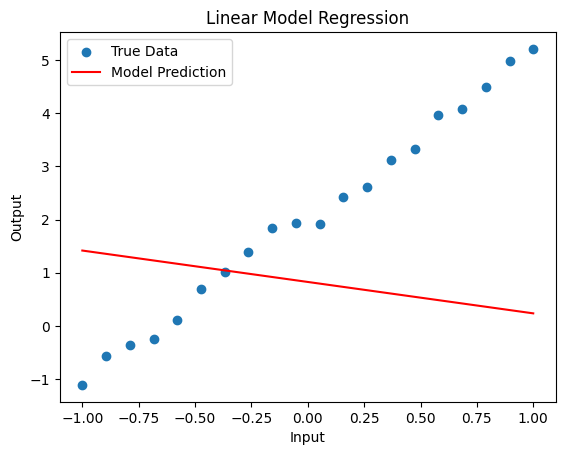

In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

x_train = np.linspace(-1, 1, 100).reshape(-1, 1)
y_train = 3 * x_train + 2 + np.random.normal(0, 0.2, size=x_train.shape)

x_test = np.linspace(-1, 1, 20).reshape(-1, 1)
y_test = 3 * x_test + 2 + np.random.normal(0, 0.2, size=x_test.shape)

model = keras.Sequential([
    keras.layers.Dense(1, input_shape=(1,), activation='linear')
])

model.compile(optimizer='adam', loss='mse', metrics=['mae'])

history = model.fit(x_train, y_train, epochs=100, batch_size=10,
                    validation_data=(x_test, y_test), verbose=0)

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve: Linear Model')
plt.show()

y_pred = model.predict(x_test)

plt.scatter(x_test, y_test, label='True Data')
plt.plot(x_test, y_pred, color='red', label='Model Prediction')
plt.xlabel('Input')
plt.ylabel('Output')
plt.legend()
plt.title('Linear Model Regression')
plt.show()


# **TASK 3**

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


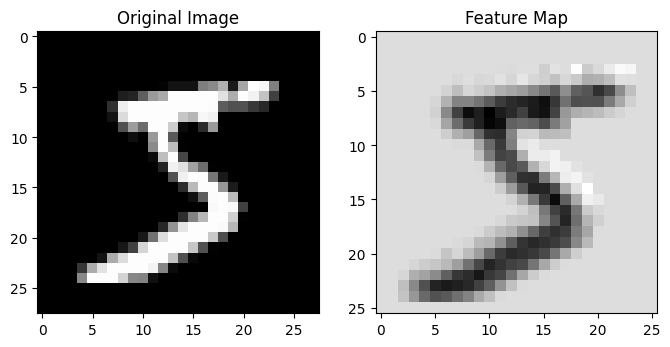

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, _), (_, _) = tf.keras.datasets.mnist.load_data()
x_train = x_train[:1].astype(np.float32) / 255.0
x_train = np.expand_dims(x_train, axis=-1)

conv_layer = tf.keras.layers.Conv2D(filters=1, kernel_size=(3, 3),
                                    activation=None, padding="valid")
x_input = tf.keras.Input(shape=(28, 28, 1))
x_output = conv_layer(x_input)
model = tf.keras.Model(inputs=x_input, outputs=x_output)

feature_map = model.predict(x_train)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.imshow(x_train[0, :, :, 0], cmap="gray")
plt.title("Original Image")

plt.subplot(1, 2, 2)
plt.imshow(feature_map[0, :, :, 0], cmap="gray")
plt.title("Feature Map")

plt.show()


# **TASK 4**

# **TASK 5**

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 17s 17ms/step - accuracy: 0.8478 - loss: 0.5153 - val_accuracy: 0.9742 - val_loss: 0.0781
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 15s 16ms/step - accuracy: 0.9753 - loss: 0.0806 - val_accuracy: 0.9843 - val_loss: 0.0504
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9821 - loss: 0.0549 - val_accuracy: 0.9823 - val_loss: 0.0516
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 17ms/step - accuracy: 0.9871 - loss: 0.0420 - val_accuracy: 0.9861 - val_loss: 0.0427
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 16s 17ms/step - accuracy: 0.9895 - loss: 0.0345 - val_accuracy: 0.9851 - val_loss: 0.0446


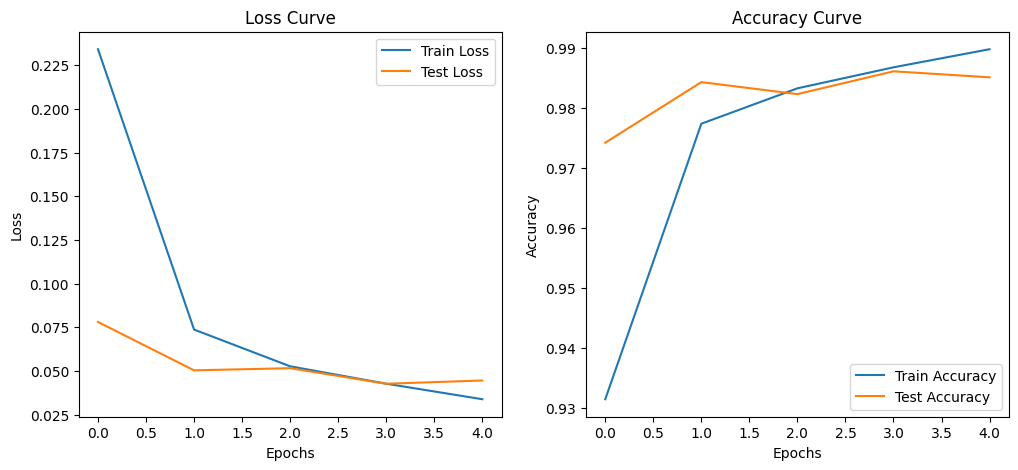

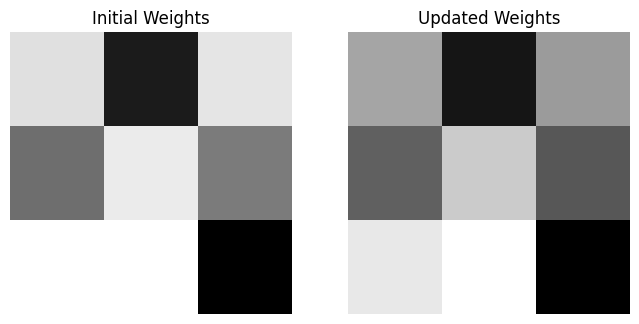

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(filters=8, kernel_size=(3, 3),
                           activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3),
                           activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

initial_weights = model.get_weights()

history = model.fit(x_train, y_train, epochs=5, batch_size=64,
                    validation_data=(x_test, y_test), verbose=1)

updated_weights = model.get_weights()

conv1_initial = initial_weights[0]
conv1_updated = updated_weights[0]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss Curve')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy Curve')

plt.show()

fig, axes = plt.subplots(1, 2, figsize=(8, 4))
axes[0].imshow(conv1_initial[:, :, 0, 0], cmap='gray')
axes[0].set_title("Initial Weights")
axes[0].axis('off')

axes[1].imshow(conv1_updated[:, :, 0, 0], cmap='gray')
axes[1].set_title("Updated Weights")
axes[1].axis('off')

plt.show()
